<a href="https://colab.research.google.com/github/ReidelVichot/DEFreightProfiles/blob/main/Copy_of_Roads_Tracks%201-5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd

In [2]:
!pip install contextily

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.6/20.6 MB 21.3 MB/s eta 0:00:00


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Import CCD from google drive Source: Census
ccd_name = "/content/drive/My Drive/FreightProfiles/tl_rd22_10_cousub (1)/tl_rd22_10_cousub.shp"
ccd =  gpd.read_file(ccd_name)
ccd = ccd.to_crs("EPSG:2235")
# Import tracks from google drive
# Source: Fist Maps
# https://de-firstmap-delaware.hub.arcgis.com/datasets/railroad-rail-lines/explore?location=39.655622%2C-75.765561%2C13.56
rail_name = "/content/drive/MyDrive/FreightProfiles/Delaware_Multimodal_2.0_tracks/Delaware_Multimodal_2.0.shp"
rail = gpd.read_file(rail_name)
rail = rail.to_crs("EPSG:2235")
cols = ['NAME','geometry']
ccd = ccd[cols]
cols = ['TRACK_TYPE', 'STATUS', 'LINE_ID', 'OWNER', 'geometry']
rail = rail[cols]

In [5]:
taz_name = "/content/drive/MyDrive/temp_dstep23/TAZ_analysis/DE_TAZ_2021_TRKGEN_region.shp"
taz = gpd.read_file(taz_name)
taz = taz.to_crs("EPSG:2235")

In [6]:
taz["FIS"] = taz['TRN_UTL_20'] + taz['LE_HOSP_20'] + taz['CONS_20'] + taz['MANU_20']
taz["SIS"] = taz['OT_SVCS_20'] + taz['ED_HEALTH_'] + taz['FINANCE_20'] + taz['PRO_BUS_20'] + taz['LE_HOSP_20'] + taz['INFO_20']
taz["FIS_per"] = taz["FIS"]/taz['TOT_20']*100
taz_grpd = taz.groupby("CCD").sum(numeric_only = True)
taz_grpd["FIS_per"] = taz_grpd["FIS"]/taz_grpd["TOT_20"]*100
taz_grpd["FIS_capita"] = taz_grpd["FIS"]/taz_grpd["POP_20"]
taz_grpd.reset_index(inplace=True)
taz_grpd.at[ 9, "CCD"] = "Lower Christiana"
taz_grpd.at[25, "CCD"] = "Upper Christiana"
taz_grpd.at[12, "CCD"] = "Middletown-Odessa"
taz_grpd.at[20, "CCD"] = "Pike Creek-Central Kirkwood"
ccd = ccd.merge(taz_grpd, left_on="NAME", right_on="CCD")

                                                    length_ft  length_miles
OWNER                                   STATUS                             
CSX Transportation                      Active   27370.423085      5.183794
National Railroad Passenger Corporation Active  173582.345333     32.875455
Norfolk Southern Corporation            Active   13594.687556      2.574752


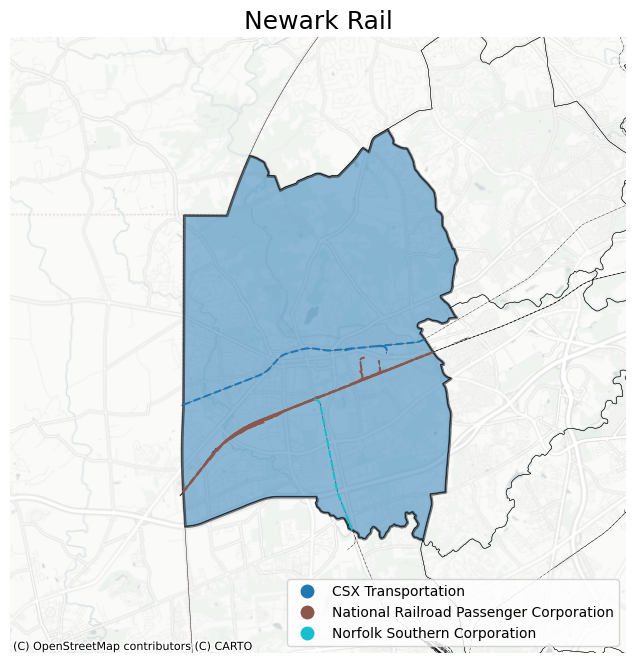

In [7]:
import contextily as cx

CCD = "Newark"
resol = 30000
x_low = ccd[ccd["NAME"]==CCD].centroid.x.values[0] - resol
x_high = ccd[ccd["NAME"]==CCD].centroid.x.values[0] + resol
y_low = ccd[ccd["NAME"]==CCD].centroid.y.values[0] - resol
y_high = ccd[ccd["NAME"]==CCD].centroid.y.values[0] + resol

fig, ax = plt.subplots(figsize=(8,8))

plt.title(CCD + " Rail", fontdict={"fontsize":18})

ccd.plot(facecolor = "none", lw = 0.3, ax=ax)
ccd[ccd["NAME"]==CCD].plot(alpha=0.5, edgecolor="k", lw = 2 , ax=ax)
rail.plot(color="k", linestyle="-.", lw = 0.3, ax=ax)

intersect = gpd.overlay(rail[rail.STATUS=="Active"], ccd[ccd["NAME"]==CCD], how="intersection")
intersect.plot("OWNER", linestyle="--", ax=ax,
                        legend=True,
                        legend_kwds={'loc':"lower right"})

ax.set_xlim(x_low, x_high)
ax.set_ylim(y_low, y_high)
ax.set_axis_off()

cx.add_basemap(ax, source=cx.providers.CartoDB.PositronNoLabels, crs = "EPSG:2235")
fig.show()

intersect["length_ft"] = intersect.length
intersect["length_miles"] = intersect.length_ft * 0.000189394

print(intersect.groupby(["OWNER", "STATUS"]).sum(numeric_only = True)[["length_ft", "length_miles"]])

In [8]:
#road_invent = gpd.read_file("/content/drive/MyDrive/FreightProfiles/Delaware_Road_Inventory_2.0 (2)/Delaware_Road_Inventory_2.0.shp")

In [9]:
CFC = gpd.read_file("/content/drive/MyDrive/FreightProfiles/Delaware_Freight_Corridors_-_FAST_Act_Critical_2.0 (1)/Delaware_Freight_Corridors_-_FAST_Act_Critical_2.0.shp")
CFC = CFC.to_crs("EPSG:2235")

In [10]:
#Freight Movement Bottlenecks
FMB = gpd.read_file("/content/drive/MyDrive/FreightProfiles/FreightMovementBottlenecks/Delaware_Multimodal_2.0.shp")
FMB = FMB.to_crs("EPSG:2235")

In [11]:
CFC['FREIGHT_NE'].unique()

array(['CUFC', 'CRFC', 'PFN'], dtype=object)

In [12]:
CoastalCorridor = gpd.read_file("/content/drive/MyDrive/FreightProfiles/CoastalCorridor/Delaware_Multimodal_2.0.shp")
CoastalCorridor = CoastalCorridor.to_crs("EPSG:2235")

MetroCorridor = gpd.read_file("/content/drive/MyDrive/FreightProfiles/MetroCorridor/Delaware_Multimodal_2.0.shp")
MetroCorridor = MetroCorridor.to_crs("EPSG:2235")

LewesCorridor = gpd.read_file("/content/drive/MyDrive/FreightProfiles/LewesCorridor/Delaware_Multimodal_2.0.shp")
LewesCorridor = LewesCorridor.to_crs("EPSG:2235")

BayCorridor = gpd.read_file("/content/drive/MyDrive/FreightProfiles/BayCorridor/Delaware_Multimodal_2.0.shp")
BayCorridor = BayCorridor.to_crs("EPSG:2235")

PiedmontCorridor = gpd.read_file("/content/drive/MyDrive/FreightProfiles/PiedmontCorridor/Delaware_Multimodal_2.0.shp")
PiedmontCorridor = PiedmontCorridor.to_crs("EPSG:2235")

<Axes: >

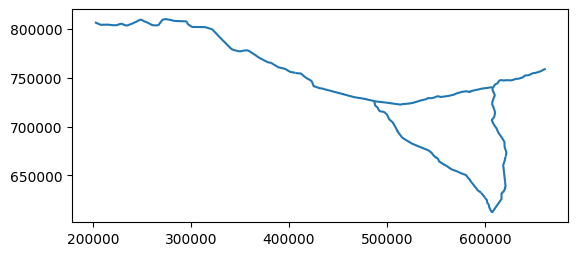

In [13]:
PiedmontCorridor.plot()

/usr/local/lib/python3.10/dist-packages/geopandas/plotting.py:695: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/geopandas/plotting.py:695: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/geopandas/plotting.py:695: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/geopandas/plotting.py:695: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/geopandas/plotting.py:695: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/geopandas/plotting.py:658: UserWarning: Only specify one of 'colu

Empty DataFrame
Columns: [LENGTH, length_ft, length_miles]
Index: []
Empty DataFrame
Columns: [UNIT_TRUCK]
Index: []


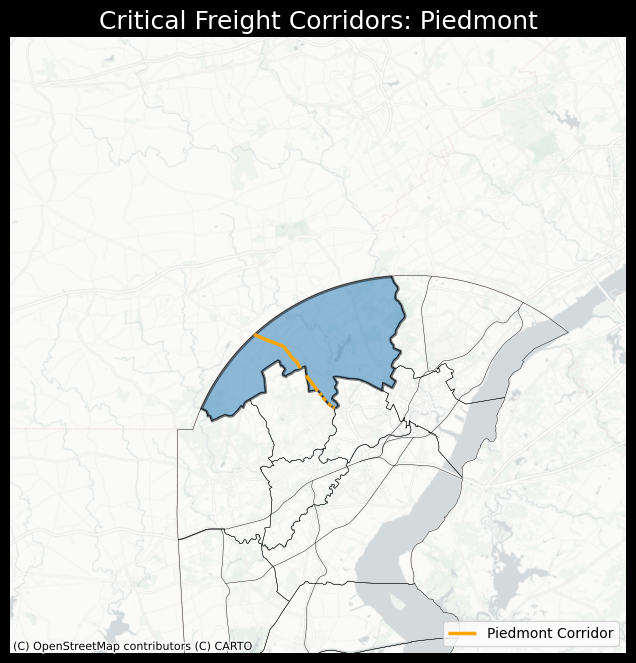

In [14]:
import contextily as cx

CCD = "Piedmont"
resol = 85000
x_low = ccd[ccd["NAME"]==CCD].centroid.x.values[0] - resol
x_high = ccd[ccd["NAME"]==CCD].centroid.x.values[0] + resol
y_low = ccd[ccd["NAME"]==CCD].centroid.y.values[0] - resol
y_high = ccd[ccd["NAME"]==CCD].centroid.y.values[0] + resol

font = {'color':  'white',
        'weight': 'normal',
        'size': 18}

fig, ax = plt.subplots(figsize=(8,8), facecolor="k")

plt.title("Critical Freight Corridors: " + CCD, fontdict=font)

ccd.plot(facecolor = "none", lw = 0.3, ax=ax)
ccd[ccd["NAME"]==CCD].plot(alpha=0.5, edgecolor="k", lw = 2 , ax=ax)
CFC.plot(color="k", linestyle="-", lw = 0.3, ax=ax)

metro_intercept = gpd.overlay(MetroCorridor, ccd[ccd['NAME']==CCD],
                                how="intersection")
metro_intercept.plot(linestyle="-", ax=ax, lw = 2.5,
                             label = 'Metro Corridor', color="orange",
                             zorder=1);

piedmont_intercept = gpd.overlay(PiedmontCorridor, ccd[ccd['NAME']==CCD],
                                how="intersection")
piedmont_intercept.plot(linestyle="-", ax=ax, lw = 2.5,
                             label = 'Piedmont Corridor', color="orange",
                             zorder=1);

bay_intercept = gpd.overlay(BayCorridor, ccd[ccd['NAME']==CCD],
                                how="intersection")
bay_intercept.plot(linestyle="-", ax=ax, lw = 2.5,
                             label = 'Bay Corridor', color="orange",
                             zorder=1);

lewes_intercept = gpd.overlay(LewesCorridor, ccd[ccd['NAME']==CCD],
                                how="intersection")
lewes_intercept.plot(linestyle="-", ax=ax, lw = 2.5,
                             label = 'Lewes Corridor', color="orange",
                             zorder=1);


coastal_intercept = gpd.overlay(CoastalCorridor, ccd[ccd['NAME']==CCD],
                                how="intersection")
coastal_intercept.plot(linestyle="-", ax=ax, lw = 2.5,
                             label = 'Coastal Corridor', color="wheat",
                             zorder=1);

intersect = gpd.overlay(CFC, ccd[ccd["NAME"]==CCD],
            how="intersection")

intersect[intersect["FREIGHT_NE"]=='CUFC'].plot(linestyle="-", ax=ax,
                             label = 'CUFC', color="steelblue");
intersect[intersect["FREIGHT_NE"]== 'CRFC'].plot(linestyle="-", ax=ax,
                             label = 'CRFC', color="darkgreen");
intersect[intersect["FREIGHT_NE"]== 'PFN'].plot(linestyle="-", ax=ax,
                             label = 'PFN', color="peru");


bottleneck_intersect = gpd.overlay(FMB, ccd[ccd["NAME"]==CCD],
            how="intersection")

bottleneck_intersect.plot("ROADNAME", linestyle="-", ax=ax,
                             label = "Bottleneck", color="red");

ax.set_xlim(x_low, x_high)
ax.set_ylim(y_low, y_high)
ax.set_axis_off()

cx.add_basemap(ax, source=cx.providers.CartoDB.PositronNoLabels, crs = "EPSG:2235")
ax.legend(loc='lower right')
fig.show()

intersect["length_ft"] = intersect.length
intersect["length_miles"] = intersect.length_ft * 0.000189394
print(intersect.groupby("FREIGHT_NE").sum(numeric_only = True)[["LENGTH", "length_ft", "length_miles"]])
print(bottleneck_intersect.groupby("ROADNAME").sum(numeric_only = True)[["UNIT_TRUCK"]])

In [15]:
plt.rcdefaults()

In [33]:
CCD = "Dover"
resol = 85000
x_low = ccd[ccd["NAME"]==CCD].centroid.x.values[0] - resol
x_high = ccd[ccd["NAME"]==CCD].centroid.x.values[0] + resol
y_low = ccd[ccd["NAME"]==CCD].centroid.y.values[0] - resol
y_high = ccd[ccd["NAME"]==CCD].centroid.y.values[0] + resol

font = {'color':  'black',
        'weight': 'normal',
        'size': 16}

# [left, bottom, width, height]


/usr/local/lib/python3.10/dist-packages/geopandas/plotting.py:695: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/geopandas/plotting.py:695: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/geopandas/plotting.py:695: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/geopandas/plotting.py:695: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/geopandas/plotting.py:695: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/geopandas/plotting.py:658: UserWarning: Only specify one of 'colu

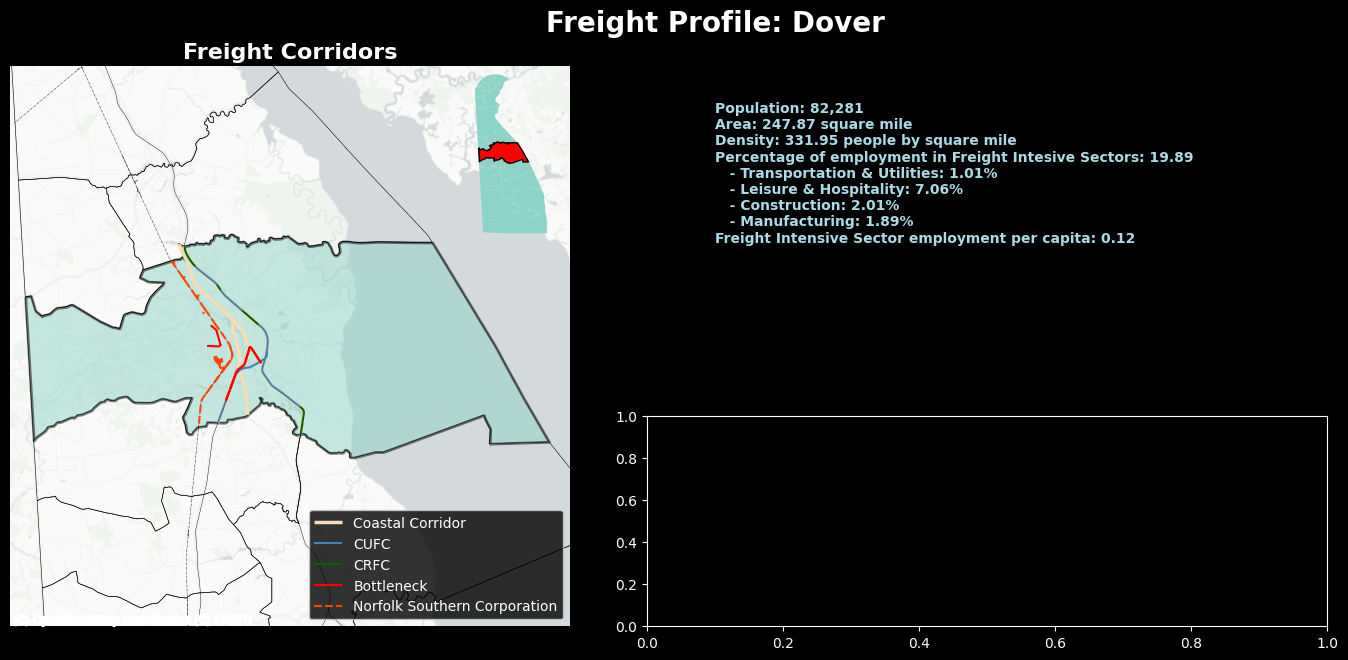

In [35]:
plt.style.use("dark_background")
fig = plt.figure(figsize=(17, 7))

ax = fig.add_axes([0.05, 0.05, 0.4, 0.8])
plt.title("Freight Corridors", fontdict= {'color':  'white',
        'weight': 'bold',
        'size': 16})

ccd.plot(facecolor = "none", lw = 0.4, edgecolor="k", ax=ax)



ccd[ccd["NAME"]==CCD].plot(alpha=0.5, edgecolor="k", lw = 2 , ax=ax)
CFC.plot(color="k", linestyle="-", lw = 0.3, ax=ax)

metro_intercept = gpd.overlay(MetroCorridor, ccd[ccd['NAME']==CCD],
                                how="intersection")
metro_intercept.plot(linestyle="-", ax=ax, lw = 2.5,
                             label = 'Metro Corridor', color="orange",
                             zorder=1);

piedmont_intercept = gpd.overlay(PiedmontCorridor, ccd[ccd['NAME']==CCD],
                                how="intersection")
piedmont_intercept.plot(linestyle="-", ax=ax, lw = 2.5,
                             label = 'Piedmont Corridor', color="orange",
                             zorder=1);

bay_intercept = gpd.overlay(BayCorridor, ccd[ccd['NAME']==CCD],
                                how="intersection")
bay_intercept.plot(linestyle="-", ax=ax, lw = 2.5,
                             label = 'Bay Corridor', color="orange",
                             zorder=1);

lewes_intercept = gpd.overlay(LewesCorridor, ccd[ccd['NAME']==CCD],
                                how="intersection")
lewes_intercept.plot(linestyle="-", ax=ax, lw = 2.5,
                             label = 'Lewes Corridor', color="orange",
                             zorder=1);


coastal_intercept = gpd.overlay(CoastalCorridor, ccd[ccd['NAME']==CCD],
                                how="intersection")
coastal_intercept.plot(linestyle="-", ax=ax, lw = 2.5,
                             label = 'Coastal Corridor', color="wheat",
                             zorder=1);

intersect = gpd.overlay(CFC, ccd[ccd["NAME"]==CCD],
            how="intersection")

intersect[intersect["FREIGHT_NE"]=='CUFC'].plot(linestyle="-", ax=ax,
                             label = 'CUFC', color="steelblue");
intersect[intersect["FREIGHT_NE"]== 'CRFC'].plot(linestyle="-", ax=ax,
                             label = 'CRFC', color="darkgreen");
intersect[intersect["FREIGHT_NE"]== 'PFN'].plot(linestyle="-", ax=ax,
                             label = 'PFN', color="peru");


bottleneck_intersect = gpd.overlay(FMB, ccd[ccd["NAME"]==CCD],
            how="intersection")

bottleneck_intersect.plot("ROADNAME", linestyle="-", ax=ax,
                             label = "Bottleneck", color="red");

rail.plot(color="k", linestyle="-.", lw = 0.3, ax=ax)

palette = ["orangered", "gold", "olive", "salmon", "tomato", "darksalmon",
           "coral", "indianred", "brown", "firebrick", "maroon"]

for i in range(len(rail["OWNER"].unique())):
  intersect_rail = gpd.overlay(rail[rail.OWNER==rail["OWNER"].unique()[i]], ccd[ccd["NAME"]==CCD], how="intersection");
  intersect_rail.plot("OWNER", linestyle="--", ax=ax, label = rail["OWNER"].unique()[i], color = palette[i]);

ax.set_xlim(x_low, x_high)
ax.set_ylim(y_low, y_high)
ax.set_axis_off()

ax2 = fig.add_axes([0.33, 0.60, 0.1, 0.25])
ccd.plot(ax=ax2)
ccd[ccd['NAME'] == CCD].plot(ax=ax2, color="r", edgecolor="k", lw = 1)
ax2.set_axis_off()

ax3 = fig.add_axes([0.460, 0.40, 0.4, 0.45])
ax3.set_axis_off()

ax4 = fig.add_axes([0.460, 0.05, 0.4, 0.3])

cx.add_basemap(ax, source=cx.providers.CartoDB.PositronNoLabels, crs = "EPSG:2235")
ax.legend(loc='lower right')

header = fig.text(0.5, 0.90, "Freight Profile: " + CCD, fontsize=20, color="w", weight="bold", ha="center")
content =  fig.text(0.5, 0.80,  "Population: " +  "{:,}".format(ccd[ccd["NAME"]==CCD]["POP_20"].values[0]) + "\n" +
                                "Area: " + "{:,.2f}".format(ccd[ccd["NAME"]==CCD].area.values[0]*3.58701e-8) + " square mile\n" +
                                "Density: " + "{:,.2f}".format(ccd[ccd["NAME"]==CCD]["POP_20"].values[0] / ccd[ccd["NAME"]==CCD].area.values[0] / 3.58701e-8) + " people by square mile\n" +
                                "Percentage of employment in Freight Intesive Sectors: " + "{:.2f}".format(ccd[ccd["NAME"]==CCD]["FIS_per"].values[0]) + "\n" +
                                "   - Transportation & Utilities: " + "{:,.2f}%".format(ccd[ccd["NAME"]==CCD]["TRN_UTL_20"].values[0] / ccd[ccd["NAME"]==CCD]["POP_20"].values[0]*100) +  "\n" +
                                "   - Leisure & Hospitality: " + "{:,.2f}%".format(ccd[ccd["NAME"]==CCD]["LE_HOSP_20"].values[0] / ccd[ccd["NAME"]==CCD]["POP_20"].values[0]*100) +  "\n" +
                                "   - Construction: " + "{:,.2f}%".format(ccd[ccd["NAME"]==CCD]["CONS_20"].values[0] / ccd[ccd["NAME"]==CCD]["POP_20"].values[0]*100) +  "\n" +
                                "   - Manufacturing: " + "{:,.2f}%".format(ccd[ccd["NAME"]==CCD]["MANU_20"].values[0] / ccd[ccd["NAME"]==CCD]["POP_20"].values[0]*100) + "\n" +
                                "Freight Intensive Sector employment per capita: " + "{:.2f}".format(ccd[ccd["NAME"]==CCD]["FIS_capita"].values[0]) + "\n" +
                                ""
                      , color="lightblue", weight="bold", va="top")

fig.show()
plt.rcdefaults()


In [18]:
rail["OWNER"].unique()

array(['Norfolk Southern Corporation', 'CSX Transportation',
       'National Railroad Passenger Corporation', 'State of Delaware',
       'East Penn Railroad LLC', 'NRG Energy Inc.',
       'Historic Red Clay Valley', 'Maryland & Delaware Railroad Company',
       'Consolidated Rail Corporation', 'Evraz Claymont Steel, Inc.'],
      dtype=object)

/usr/local/lib/python3.10/dist-packages/geopandas/plotting.py:658: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/geopandas/plotting.py:658: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/geopandas/plotting.py:658: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/geopandas/plotting.py:658: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/geopandas/plotting.py:695: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/geopandas/plotting.py:658: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/geopandas/plotti

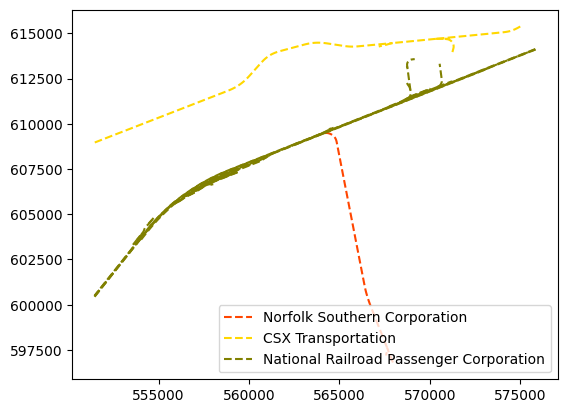

In [19]:
palette = ["orangered", "gold", "olive", "salmon", "tomato", "darksalmon", "coral", "indianred", "brown", "firebrick", "maroon"]
fig, ax = plt.subplots()
for i in range(len(rail["OWNER"].unique())):
  intersect_rail = gpd.overlay(rail[rail.OWNER==rail["OWNER"].unique()[i]], ccd[ccd["NAME"]=="Newark"], how="intersection")
  intersect_rail.plot("OWNER", linestyle="--", ax=ax, label = rail["OWNER"].unique()[i], color = palette[i])
ax.legend(loc='lower right')
fig.show()

In [20]:
intersect_rail = gpd.overlay(rail[rail.STATUS=="Active"], ccd[ccd["NAME"]==CCD], how="intersection")

In [21]:
len(rail["OWNER"].unique())

10

In [22]:
"{:.2f}".format(ccd[ccd["NAME"]==CCD]["FIS_per"].values[0])

'30.51'

In [23]:
ccd[ccd["NAME"]==CCD].area.values[0]

838968663.8214165